# 1. DATA IMPORT AND EXPLORATION

In [123]:
# 1. DATA IMPORT AND EXPLORATION

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from pyxlsb import open_workbook


iris = sns.load_dataset("iris")
row_num = len(iris.index)
row_num


150

In [124]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [125]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [126]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [127]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [128]:
shape=iris.shape
print(f"\nThis means that this dataset has rows and columns. {shape}\n")


This means that this dataset has rows and columns. (150, 5)



In [129]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [130]:
iris['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [131]:
iris.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [132]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. DATA VISUALISATION

Plots matrix

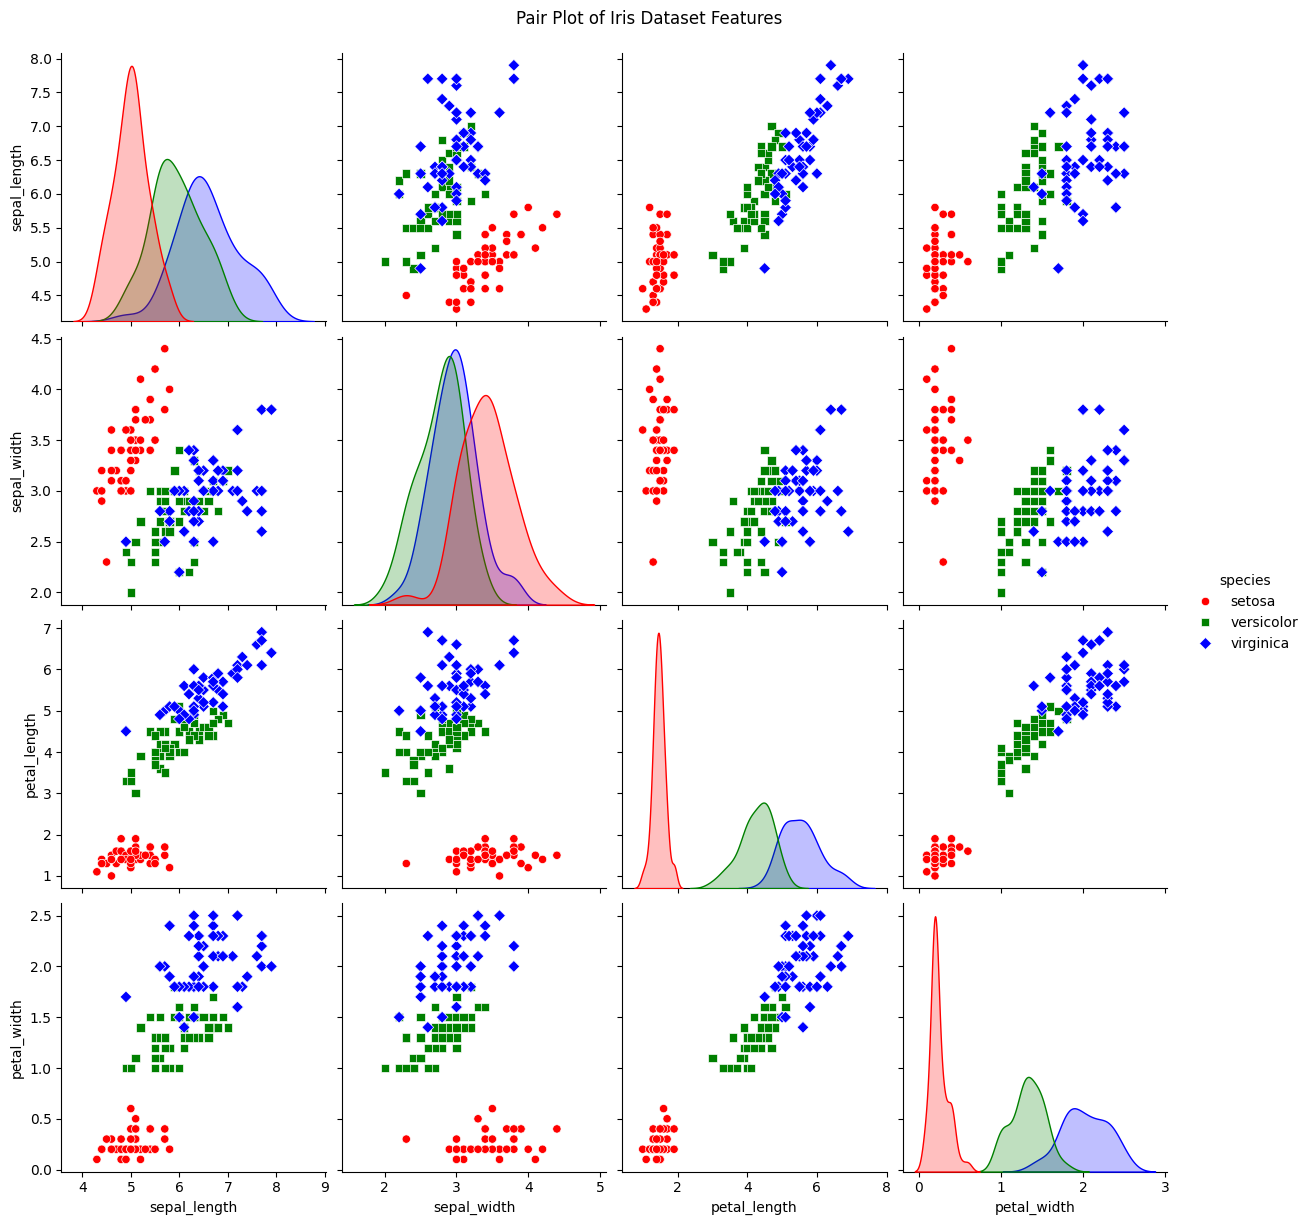

In [133]:
# A pairplot is a grid of subplots that visualizes the pairwise relationships between multiple variables in a dataset.
# sns.pairplot(iris, hue="Species", height=2.5)
# Remove the 'Id' column if present
sns.pairplot(iris, hue="species", palette=["red", "green", "blue"], markers=["o", "s", "D"], height=3)
# sns.pairplot(iris, hue='species',, palette="bright")
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()

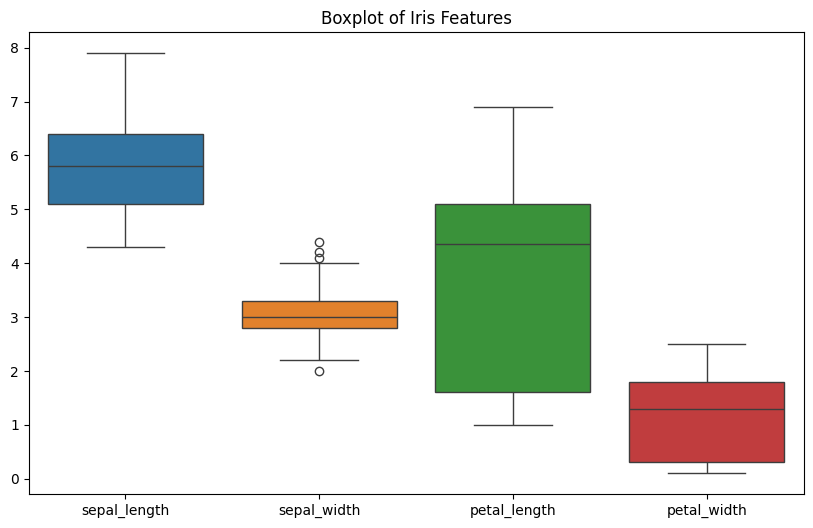

In [134]:
# Boxplots for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris)
plt.title("Boxplot of Iris Features")
plt.show()

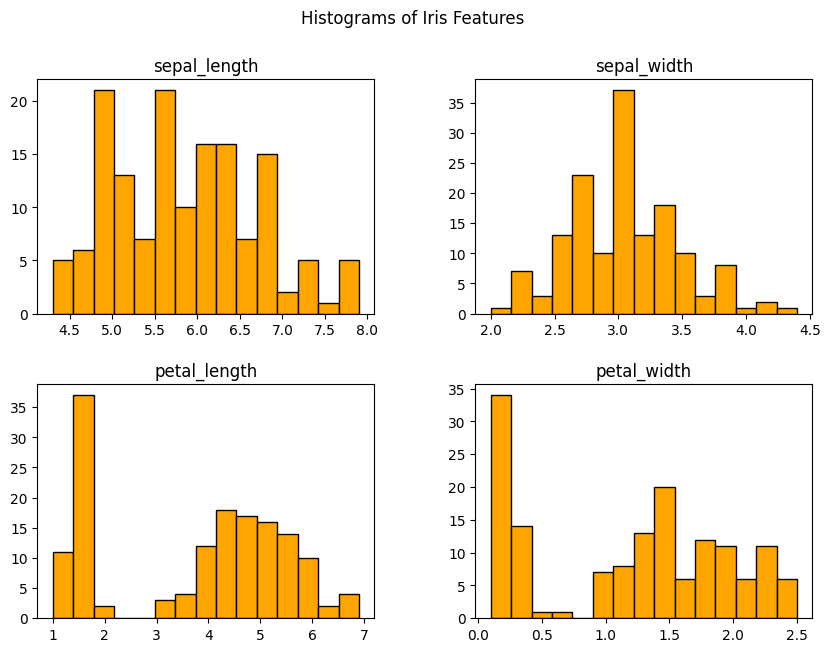

In [135]:

iris.hist(figsize=(10, 7), bins=15,edgecolor='black',color='orange', grid=False) #layout=(5, 5))
# Plot histograms with custom color and no gridlines
# iris.hist(figsize=(10, 7), bins=15, color=colors, edgecolor='black', grid=False)
plt.suptitle("Histograms of Iris Features")
plt.show()

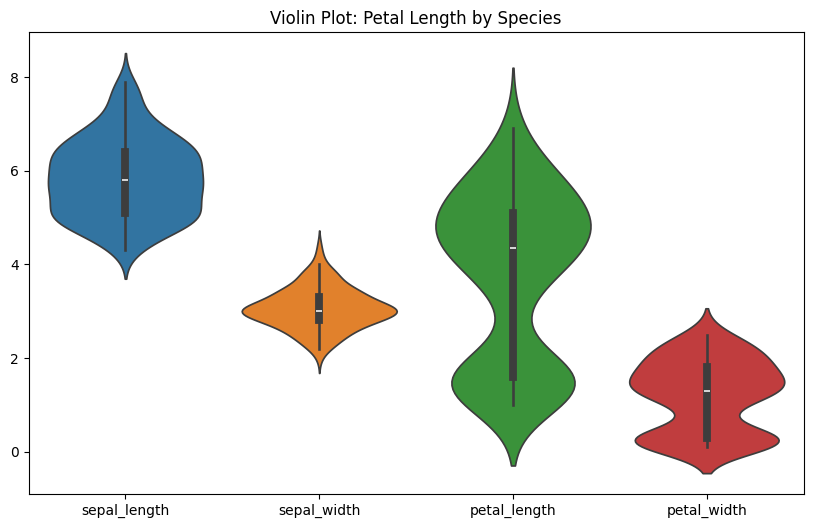

In [136]:
# Additional Plot → Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=iris)
plt.title("Violin Plot: Petal Length by Species")
plt.show()

3. STATISTICAL SUMMARY AND INSIGHTS

In [137]:
#Means per species
means = iris.groupby("species").mean()
print(f"\nMeans per species:\n{means}\n")


Means per species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026



In [139]:
#Medians per species
medians = iris.groupby("species").median()
print(f"\nMedians per Species:\n{medians}\n")


Medians per Species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0



In [140]:
stds = iris.groupby("species").std()
print(f"\nStandard deviations per Species:\n{stds}\n")


Standard deviations per Species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.379064      0.173664     0.105386
versicolor      0.516171     0.313798      0.469911     0.197753
virginica       0.635880     0.322497      0.551895     0.274650



# 4. SIMPLE CLASSIFICATION MODEL (k-NN)

Brief explanation of k-NN:

k-Nearest Neighbors (k-NN) is a simple, instance-based algorithm.

It predicts the class of a new data point based on the majority class among its k closest points in the training set.

No explicit model training is required beyond storing the dataset.

Interpreting the results:

Accuracy: Usually above 95% on Iris, since the dataset is well-separated.

Confusion matrix: Helps see which species are sometimes misclassified (e.g., Versicolor vs Virginica may have minor confusion).

Insight: Petal features are key for accurate classification; Sepal features alone may not be enough to separate species perfectly.

Feature selection

In [141]:

# Take all columns except species. These are your features for the model.
X = iris.drop("species", axis=1)
# Take only Species as the target (what the model should predict).
y = iris["species"]

# Why we “drop” the target from X

# Machine learning models need:

# X → the input features

# y → the output/target

# If Species stayed in X, the model could “cheat” because it would literally see the answer!

# Dropping it ensures the model only uses the real measurements (SepalLength, PetalLength, etc.) to predict the species.

In [142]:
# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [143]:
# Implement k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [144]:
# Predictions
y_pred = knn.predict(X_test)

In [145]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 1.0


In [146]:
# 6. Evaluate model

report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", report)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [147]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("""
k-NN Algorithm Explanation:
-------------------------------------
k-Nearest Neighbors (k-NN) is a simple,
instance-based learning algorithm. For a new input point,
it finds the 'k' closest points in the training dataset 
and assigns the most common class among them.

Interpretation of Results:
- A high accuracy (typically >90% for Iris) indicates
  that species are well-separated in feature space.
- The confusion matrix shows correct vs. incorrect
  classifications per species.
""")


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

k-NN Algorithm Explanation:
-------------------------------------
k-Nearest Neighbors (k-NN) is a simple,
instance-based learning algorithm. For a new input point,
it finds the 'k' closest points in the training dataset 
and assigns the most common class among them.

Interpretation of Results:
- A high accuracy (typically >90% for Iris) indicates
  that species are well-separated in feature space.
- The confusion matrix shows correct vs. incorrect
  classifications per species.



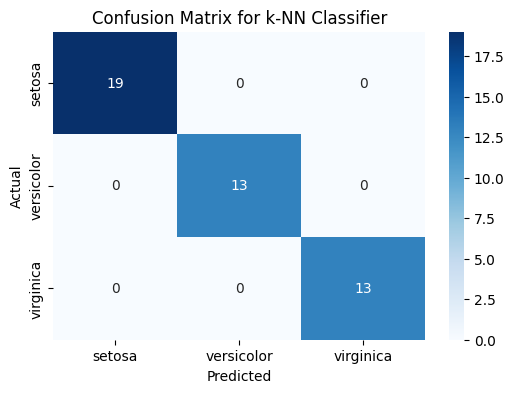


k-NN Algorithm Explanation:
-------------------------------------
k-Nearest Neighbors (k-NN) is a simple,
instance-based learning algorithm. For a new input point,
it finds the 'k' closest points in the training dataset 
and assigns the most common class among them.

Interpretation of Results:
- A high accuracy (typically >90% for Iris) indicates
  that species are well-separated in feature space.
- The confusion matrix shows correct vs. incorrect
  classifications per species.


Key points:

Diagonal elements → Correct predictions (19, 13, 13)

Off-diagonal elements → Misclassifications (all 0 here)

Overall accuracy → (19 + 13 + 13) / total samples = 45 / 45 = 100%

✅ This confusion matrix shows a perfect classification on the test data: no errors at all.



In [148]:
# Confusion matrix
cm_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-NN Classifier')
plt.show()
print("""
k-NN Algorithm Explanation:
-------------------------------------
k-Nearest Neighbors (k-NN) is a simple,
instance-based learning algorithm. For a new input point,
it finds the 'k' closest points in the training dataset 
and assigns the most common class among them.

Interpretation of Results:
- A high accuracy (typically >90% for Iris) indicates
  that species are well-separated in feature space.
- The confusion matrix shows correct vs. incorrect
  classifications per species.
""")

print("""
Key points:

Diagonal elements → Correct predictions (19, 13, 13)

Off-diagonal elements → Misclassifications (all 0 here)

Overall accuracy → (19 + 13 + 13) / total samples = 45 / 45 = 100%

✅ This confusion matrix shows a perfect classification on the test data: no errors at all.
""")

How to read it:

Interpretation: FOR STUDENTS

In [ ]:

Rows: Actual species (0=setosa, 1=versicolor, 2=virginica).
Columns: Predicted species.
Diagonal (19, 13, 13) = correct predictions.
Off-diagonals = errors (all zeros here—perfect!).


Key concept: For multi-class problems, it shows where the model confuses similar classes.

Understanding the k-NN Model
What is k-NN?

Full name: k-Nearest Neighbors.
Type: Supervised, instance-based (non-parametric) algorithm for classification (or regression).
Output: The predicted class.

Pros:
Simple, intuitive, no training time (just store data).
Works well for small, clean datasets like Iris.
Adapts to any data shape (non-linear).

Cons:
Slow on large data (must check all points for each prediction).
Sensitive to irrelevant features, noise, or bad k value (too small = overfitting; too big = underfitting).
"Curse of dimensionality": Struggles in high dimensions.

Why k=3 here? Odd numbers avoid ties; chosen empirically (you could tune it with cross-validation).
Distance metric: Defaults to Euclidean, but you can change it (e.g., Manhattan for grid-like data).
In this case: With Iris's low dimensions and clear separation, k-NN achieves 100% accuracy—setosa is easily separable, while the others overlap slightly but k=3 handles it perfectly.

If you tweak k (e.g., to 5), accuracy might drop slightly. To experiment, try n_neighbors=1 (risky, overfits) or add metric='manhattan